In [ ]:
#imports
import pandas as pd
import sys
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import numpy as np
import os

# For figures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
splits = {'train': 'plain_text/train-00000-of-00001.parquet', 'test': 'plain_text/test-00000-of-00001.parquet', 'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df_train.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


# Perceptron Learning Algorithm

In [ ]:
#Perceptron Imports
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
#Decide Tokenizer (tdiff)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
#Split Data
#Features
X_train = df_train.text
X_test = df_test.text
#Labels
y_train = df_train.label
y_test = df_test.label
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(X_train)

In [ ]:
#Vectorize the features
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print(X_train_vectorized.shape, X_test_vectorized.shape)
print(X_train_vectorized[0])

(25000, 74849) (25000, 74849)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 174 stored elements and shape (1, 74849)>
  Coords	Values
  (0, 54903)	0.06476554927724912
  (0, 2906)	0.12333233173924832
  (0, 16037)	0.20498836263965098
  (0, 74187)	0.24194721160860558
  (0, 26180)	0.02132004492304038
  (0, 44639)	0.051537748627263
  (0, 71281)	0.04729066193763631
  (0, 63396)	0.06038009399316541
  (0, 6459)	0.02894165595795894
  (0, 46680)	0.07657650260765574
  (0, 2662)	0.019981737730951608
  (0, 66339)	0.1222973523659784
  (0, 14602)	0.08800082742721492
  (0, 66322)	0.05855902631869425
  (0, 64667)	0.07554883441266143
  (0, 34683)	0.08114244747080789
  (0, 72753)	0.02447514483124623
  (0, 72196)	0.05225147725555748
  (0, 24750)	0.05722108581092344
  (0, 54664)	0.05246217324925029
  (0, 33004)	0.1365782401037533
  (0, 372)	0.0875057017841636
  (0, 2821)	0.028542762508202202
  (0, 30282)	0.050835841252350515
  (0, 4753)	0.020114081363292798
  :	:
  (0, 24536)	0.057631647085

In [ ]:
#Create Perceptron Instance
perceptron = Perceptron()
perceptron.fit(X_train_vectorized, y_train)

Perceptron()

[0 0 0 ... 1 0 1]

Accuracy: 0.851
Precision: 0.8481313972863604
Recall: 0.85512
F1 Score: 0.8516113611918894


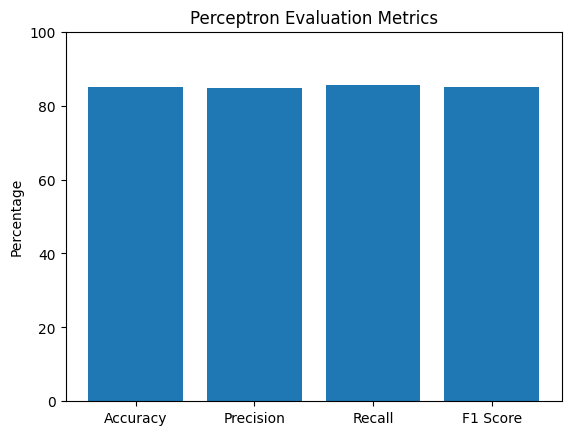

In [ ]:
#Percision, recall, Accuracy, and F1 Score:

prediction_value = perceptron.predict(X_test_vectorized)
print(prediction_value)
print()

#accuracy = correct classification/total classification
accuracy = accuracy_score(y_test, prediction_value)
print("Accuracy:", accuracy)

#precision = correct pridicted positives/ total actual positives
precision = precision_score(y_test, prediction_value)
print("Precision:", precision)

#recall = correct pridicted positives/ total predicted positives
recall = recall_score(y_test, prediction_value)
print("Recall:", recall)
#F1 Score = 2*(precision*recall)/(precision+recall)
f1_score_result = f1_score(y_test, prediction_value)
print("F1 Score:", f1_score_result)

#graph results (ymax = 1)
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy*100, precision*100, recall*100, f1_score_result*100])
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.title('Perceptron Evaluation Metrics')
plt.show()


In [ ]:
# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get Perceptron model coefficients
coefs = perceptron.coef_[0]  # Only one row since Perceptron is for binary classification

# Find the words with the most negative weights
num_words = 10  # Change this to get more words
negative_indices = np.argsort(coefs)[:num_words]  # Sort in ascending order (most negative first)
negative_indices = negative_indices[::-1]  # Reverse the order to get descending order
# Print the most negative words
print("Most Negative Words:")
for i in negative_indices:
    print(f"{feature_names[i]}: {coefs[i]}")

Most Negative Words:
fails: -2.932307157663185
worse: -3.0084231351231465
lacks: -3.095552311973679
mess: -3.2068572034873193
poorly: -3.262493247793953
boring: -3.349358512149458
disappointment: -3.3839894573751406
awful: -3.59081506156349
waste: -3.705292146245126
worst: -4.854354868549566


In [ ]:
from operator import pos
#List of positive words


# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Get Perceptron model coefficients
coefs = perceptron.coef_[0]  # Only one row since Perceptron is for binary classification
# Find the words with the most negative weights
num_words = 10  # Change this to get more words
positive_indices = np.argsort(coefs)[-num_words:]  # Sort in descending order (highest first)
positive_indices = positive_indices[::-1]
# Print the most positive words
print("Most positive Words:")
for i in positive_indices:
    print(f"{feature_names[i]}: {coefs[i]}")

Most positive Words:
excellent: 2.787468854212148
great: 2.7680221393336986
wonderfully: 2.6743281299982082
best: 2.486491091184323
brilliant: 2.4490895653147877
perfect: 2.4316103579251194
refreshing: 2.406224842915426
superb: 2.4042546722483498
today: 2.3850024068408286
highly: 2.369407056118086


# RNN Implementation

In [ ]:
#RNN model using Sequence-to-Vector
#Tokenization
max_words = 10000
max_len = 200
tokenizer = keras.preprocessing.text.Tokenizer(num_words = max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_train.text)
tokenizer.fit_on_texts(df_test.text)
sequences_train = tokenizer.texts_to_sequences(df_train.text)
sequences_test = tokenizer.texts_to_sequences(df_test.text)
X_train = keras.preprocessing.sequence.pad_sequences(sequences_train, maxlen=max_len, padding="post", truncating="post")
X_test = keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=max_len, padding="post", truncating="post")
y_train = df_train.label
y_test = df_test.label
#Create Model
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    keras.layers.Dropout(0.4),
    keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001))),
    keras.layers.Dropout(0.4),
    keras.layers.LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#Train Model
epochs = 20
batch_size = 64
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.5042 - loss: 0.9791
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5132 - loss: 0.8420
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5301 - loss: 0.7677
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6178 - loss: 0.7020
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7256 - loss: 0.6249
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7151 - loss: 0.6200
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7795 - loss: 0.5591
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7628 - loss: 0.5580
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7901 - loss: 0.5106
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8224 - loss: 0.4663
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8480 - loss: 0.4250
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s

In [ ]:
predictions_RNN = np.round(model.predict(X_test))
print(predictions_RNN)
accuracy_RNN = accuracy_score(y_test, predictions_RNN[:,0])
print("Accuracy:", accuracy_RNN)

precision_RNN = precision_score(y_test, predictions_RNN[:,0])
print("Precision:", precision_RNN)

recall_RNN = recall_score(y_test, predictions_RNN[:,0])
print("Recall:", recall_RNN)

f1_score_result_RNN = f1_score(y_test, predictions_RNN[:,0])
print("F1 Score:", f1_score_result_RNN)



782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
Accuracy: 0.8502
Precision: 0.836187696797481
Recall: 0.87104
F1 Score: 0.8532581011715842


In [ ]:
def predict_sentiment(review):
    # Tokenize and pad the review
    sequence = tokenizer.texts_to_sequences([review])
    padded = keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_len, padding="post", truncating="post")

    # Predict sentiment
    prediction = model.predict(padded)[0][0]

    # Classify as positive or negative
    sentiment = "Positive" if prediction >= 0.5 else "Negative"

    return sentiment, prediction

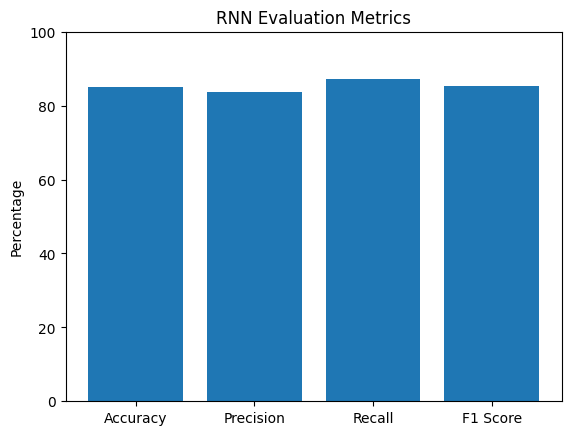

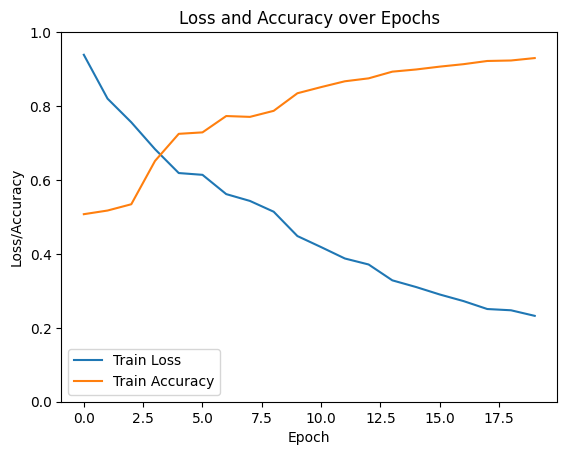

In [ ]:
#Graph Results
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1 Score'], [accuracy_RNN*100, precision_RNN*100, recall_RNN*100, f1_score_result_RNN*100] )
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.title('RNN Evaluation Metrics')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.ylim(0, 1)
plt.title('Loss and Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
example_reviews = [
    "Absolutely loved this movie, the story was touching and the performances were brilliant!",
    "This was a complete waste of time. Terrible acting and worse direction.",
    "It was okay, not great but not awful either. Had its moments.",
    "One of the best thrillers I’ve seen in a while. Kept me on the edge of my seat.",
    "I couldn’t even finish it. So boring and predictable."
]

for review in example_reviews:
    sentiment, score = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {score:.2f})\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Review: Absolutely loved this movie, the story was touching and the performances were brilliant!
Predicted Sentiment: Positive (Confidence: 0.98)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Review: This was a complete waste of time. Terrible acting and worse direction.
Predicted Sentiment: Negative (Confidence: 0.02)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Review: It was okay, not great but not awful either. Had its moments.
Predicted Sentiment: Negative (Confidence: 0.05)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Review: One of the best thrillers I’ve seen in a while. Kept me on the edge of my seat.
Predicted Sentiment: Positive (Confidence: 0.98)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Review: I couldn’t even finish it. So boring and predictable.
Predicted Sentiment: Negative (Confidence: 0.04)

